In [1]:
from numpy import array
from numpy import argmax
import numpy as np

In [2]:
text_file = open("output2.txt", "r")

In [3]:
dataset=text_file.read().splitlines()
dataset=list(filter(None,dataset))

In [4]:
# define universe of possible input values
alphabet = set('')
for l in dataset:
    alphabet=alphabet.union(set(l))
print(alphabet)
# define a mapping of chars to integers
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# integer encode input data
integer_encoded = [char_to_int[char] for char in alphabet]
print(integer_encoded)

{'7', 'x', 'щ', 'л', 'К', 'F', 'к', 'A', 'ъ', 'N', 'с', 'д', '3', 'Ъ', 'Я', '6', 'н', 'ё', 'ш', 'Ф', 'и', 'O', 'П', ':', 'Е', 'б', 'm', 'М', 't', 'х', 'Ц', ')', 'C', 'ч', 'И', 'ж', 'k', 'ы', 'в', '№', '2', '5', '(', 'L', 'l', 'ц', 'Э', 'E', 'b', '_', '\\', 'ь', 'У', 'u', 'H', 'Л', 'f', 'э', 'p', 'Й', 'D', 'e', 'z', 'o', 'Д', 'С', 'Ч', 'Y', '+', 'ю', 'З', 'V', '-', '/', 'Ш', 'P', 'J', 'О', '9', 'з', ';', 'v', 'K', '!', 'м', 'i', 'Г', 'j', '8', '.', 'А', 'T', 'h', 'M', 'Т', 'Н', 'Щ', 'n', '~', 'ф', '1', 'е', 'c', 'я', 'В', '{', '<', 'Ж', 'r', 'Б', '"', 'w', 'у', 'G', '0', '*', 'п', 'т', 'X', 'Z', '4', 'S', 'I', '=', 'U', 'й', ',', 'd', 'R', 'Ю', 'y', 'а', 'g', 'Х', 'о', 's', 'B', 'р', 'Р', '%', 'W', 'Ь', 'Ы', 'г', 'Q', 'a'}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 6

In [5]:
# one hot encode
onehot_encoded = list()
for value in integer_encoded:
	letter = [0 for _ in range(len(alphabet))]
	letter[value] = 1
	onehot_encoded.append(letter)
print(onehot_encoded)

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [6]:
print(len(onehot_encoded))

146


In [7]:
import math

ngram_vectorize=[]

# encode n-grams
for word in dataset:
    vec=[0]*len(alphabet)
    for c in list(word):
        vec+=array(onehot_encoded[char_to_int[c]])
    vec_len_2 = 0
    for x in vec:
        vec_len_2 += (x * x)
    vec = vec * (1 / math.sqrt(vec_len_2))
    ngram_vectorize.append(vec)

In [8]:
import skfuzzy as fuzz

In [9]:
vector_array=np.asarray(ngram_vectorize)
vector_array.shape

(17818, 146)

In [12]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        vector_array.T,3, 2, error=0.005, maxiter=10000, init=None)

In [13]:
print(fpc)

0.3333333336044973


In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(ngram_vectorize)

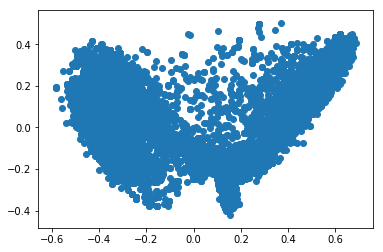

In [16]:
import matplotlib.pyplot as plt
plt.scatter(principalComponents[:,0], principalComponents[:,1])
plt.show()

In [17]:
vector_array=np.asarray(principalComponents)
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        vector_array.T,3, 2, error=0.005, maxiter=10000, init=None)
print(fpc)

0.781273408455454


In [18]:
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    vector_array.T, cntr, 2, error=0.005, maxiter=10000)

In [19]:
cluster_membership = np.argmax(u, axis=0)

In [20]:
dataset_arr=np.asarray(dataset)
words_cl_1=dataset_arr[cluster_membership == 0]
words_cl_2=dataset_arr[cluster_membership == 1]
words_cl_3=dataset_arr[cluster_membership == 2]

In [23]:
import pandas as pd
df_data=np.array([words_cl_1,words_cl_2,words_cl_3])
name_dataframe = pd.DataFrame({'Name':df_data[0]})
size_dataframe=pd.DataFrame({'Size':df_data[2]})
model_dataframe=pd.DataFrame({'Model':df_data[1]})
pd.concat([name_dataframe,size_dataframe,model_dataframe], axis=1)

,Name,Size,Model
0,метр,PH-13,рН
1,Электронный,12-55,Kellymeter
2,измеритель,44х100,и
3,влажности,(3.6/1.2),почвы
4,",температуры",1807,с
5,освещеннсти,44х120,помощи
6,логотипом,30,9В
7,Батарея,12*50,Camelion
8,аккумуляторная,16*70,DURACELL
9,Драйвер,16х70,Turbo
